# Part 1: Wikipedia Scraper

In [16]:
#!conda install -c conda-forge folium=0.5.0 --yes 
#!conda install -c conda-forge geopy --yes 
#!conda install -c conda-forge selenium --yes

In [80]:
import numpy as np
import pandas as pd

import json 
from geopy.geocoders import Nominatim

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
import folium
import requests


from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [18]:
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup = BeautifulSoup(website_url,'lxml')


My_table = soup.find('table',{'class':'wikitable sortable'})

links = My_table.findAll('td' and'tr')
#Retrieves the table

linkslen=len(links) 

In [19]:
Postalcode=[]
Borough=[]
Neighbourhood=[]

for i in range (1,linkslen):
    current_link=links[i]
    subcurrent=current_link.findAll('td')
    sublinkslen=len(subcurrent)
    
    
    Postalcode.append(subcurrent[0])        
    Borough.append(subcurrent[1])  
    Neighbourhood.append(subcurrent[2])
#formats the data into columns
df = pd.DataFrame()

In [20]:
df['Postal Code']=Postalcode
df['Borough']=Borough
df['Neighbourhood']=Neighbourhood
#formats the data into a pandas array

In [102]:
for i in range (0,3):
    for j in range (0,len(df)):
        df.iat[j,i]=str(df.iat[j,i])
        df.iat[j,i]=df.iat[j,i].replace('<td>','')
        df.iat[j,i]=df.iat[j,i].replace('</td>','')
        df.iat[j,i]=df.iat[j,i].replace('\n','')
        
#Removes html tags

In [22]:
df = df[df.Borough != 'Not assigned']
# Removes not assigned data points
df.shape

(103, 3)

# Part 2: Combining data

In [25]:
url='http://cocl.us/Geospatial_data'
loc_data=pd.read_csv(url)
#retrives data

In [110]:
df2=df.set_index('Postal Code').join(loc_data.set_index('Postal Code'))
#joins the data tables together
df2.reset_index()

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


# Part 3: Data analysis

In [58]:
toronto_map = folium.Map(location=[43.65, -79.38], zoom_start=12)
#initialises the map

Index(['M3A', 'M4A', 'M5A', 'M6A', 'M7A', 'M9A', 'M1B', 'M3B', 'M4B', 'M5B',
       ...
       'M8W', 'M9W', 'M1X', 'M4X', 'M5X', 'M8X', 'M4Y', 'M7Y', 'M8Y', 'M8Z'],
      dtype='object', name='Postal Code', length=103)

In [111]:
for Latitude, Longitude, label in zip(df2.Latitude, df2.Longitude, df2.index):
    folium.features.CircleMarker(
        [Latitude, Longitude],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(toronto_map )
    
toronto_map    
#Plots postcode data onto folium map

In [101]:
simplified_df=df2[['Longitude', 'Latitude']].values
#adjust n_clusters to change number of clusters
k_means = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means.fit(simplified_df)
k_means_labels = k_means.labels_
k_means_cluster_centers = k_means.cluster_centers_
# initialise k_means

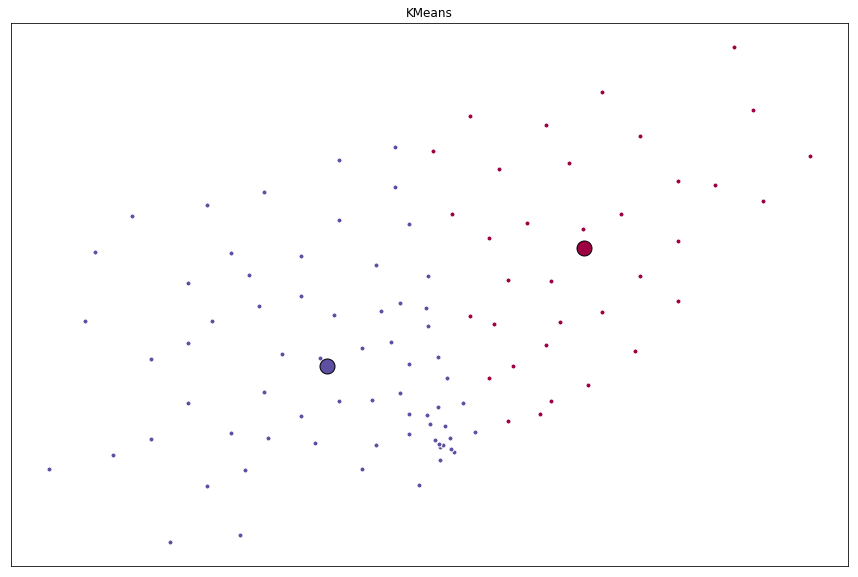

In [100]:
X=simplified_df
fig = plt.figure(figsize=(15, 10))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.', markersize=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=15)


ax.set_title('KMeans')
ax.set_xticks(())
ax.set_yticks(())
#plots the clusters
plt.show()